In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df_diabetes = pd.read_csv("pima-indians-diabetes.csv")
df_diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
df_diabetes.columns

Index([u'Number_pregnant', u'Glucose_concentration', u'Blood_pressure',
       u'Triceps', u'Insulin', u'BMI', u'Pedigree', u'Age', u'Class',
       u'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure',
       'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [9]:
df_diabetes[cols_to_norm] = df_diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [10]:
df_diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [15]:
%matplotlib inline

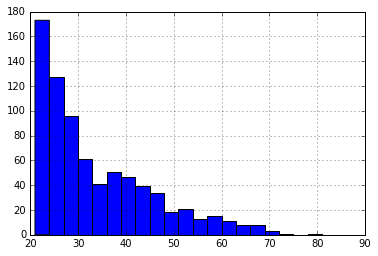

In [16]:
df_diabetes['Age'].hist(bins=20)

In [17]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [18]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

In [25]:
df_x_data = df_diabetes.drop('Class',axis=1)
labels = df_diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_x_data, labels, test_size=0.33, random_state=42)

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000, shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpbdbBH4', '_save_summary_steps': 100}


In [32]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpbdbBH4/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 372.627
INFO:tensorflow:loss = 4.74448, step = 101 (0.274 sec)
INFO:tensorflow:global_step/sec: 465.333
INFO:tensorflow:loss = 6.55909, step = 201 (0.214 sec)
INFO:tensorflow:global_step/sec: 454.415
INFO:tensorflow:loss = 4.33949, step = 301 (0.221 sec)
INFO:tensorflow:global_step/sec: 418.594
INFO:tensorflow:loss = 5.29841, step = 401 (0.239 sec)
INFO:tensorflow:global_step/sec: 533.812
INFO:tensorflow:loss = 4.26893, step = 501 (0.188 sec)
INFO:tensorflow:global_step/sec: 478.345
INFO:tensorflow:loss = 4.38194, step = 601 (0.204 sec)
INFO:tensorflow:global_step/sec: 506.989
INFO:tensorflow:loss = 4.52708, step = 701 (0.198 sec)
INFO:tensorflow:global_step/sec: 429.479
INFO:tensorflow:loss = 4.24626, step = 801 (0.235 sec)
INFO:tensorflow:global_step/sec: 517.333
INFO:tensorflow:loss = 6.26304, s

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [34]:
resulst = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-02-16:55:31
INFO:tensorflow:Restoring parameters from /tmp/tmpbdbBH4/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-02-16:55:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.740157, accuracy_baseline = 0.661417, auc = 0.773809, auc_precision_recall = 0.589786, average_loss = 0.538254, global_step = 1000, label/mean = 0.338583, loss = 5.25832, prediction/mean = 0.348243


In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10,num_epochs=1, shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpbdbBH4/model.ckpt-1000


In [38]:
my_pred

[{'class_ids': array([1]),
  'classes': array(['1'], dtype=object),
  'logistic': array([ 0.53470838], dtype=float32),
  'logits': array([ 0.13905728], dtype=float32),
  'probabilities': array([ 0.46529156,  0.53470838], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.16413517], dtype=float32),
  'logits': array([-1.62777662], dtype=float32),
  'probabilities': array([ 0.83586478,  0.16413516], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.15081418], dtype=float32),
  'logits': array([-1.72822964], dtype=float32),
  'probabilities': array([ 0.84918588,  0.15081418], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.33539379], dtype=float32),
  'logits': array([-0.68388927], dtype=float32),
  'probabilities': array([ 0.66460615,  0.33539382], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array(['

In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpvhNVh2', '_save_summary_steps': 100}


In [40]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [41]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col,age_bucket]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [46]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpCyno8H', '_save_summary_steps': 100}


In [47]:
dnn_model.train(input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpCyno8H/model.ckpt.
INFO:tensorflow:loss = 7.134, step = 1
INFO:tensorflow:global_step/sec: 311.42
INFO:tensorflow:loss = 5.82979, step = 101 (0.326 sec)
INFO:tensorflow:global_step/sec: 379.081
INFO:tensorflow:loss = 6.12669, step = 201 (0.261 sec)
INFO:tensorflow:global_step/sec: 457.559
INFO:tensorflow:loss = 3.98131, step = 301 (0.221 sec)
INFO:tensorflow:global_step/sec: 474.953
INFO:tensorflow:loss = 7.4208, step = 401 (0.210 sec)
INFO:tensorflow:global_step/sec: 387.504
INFO:tensorflow:loss = 1.87489, step = 501 (0.256 sec)
INFO:tensorflow:global_step/sec: 434.514
INFO:tensorflow:loss = 2.4848, step = 601 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.359
INFO:tensorflow:loss = 3.54002, step = 701 (0.232 sec)
INFO:tensorflow:global_step/sec: 441.133
INFO:tensorflow:loss = 2.68042, step = 801 (0.225 sec)
INFO:tensorflow:global_step/sec: 481.946
INFO:tensorflow:loss = 5.55778, step =

In [48]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y = y_test, batch_size=10, shuffle=False, num_epochs=1)

In [49]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-02-17:04:15
INFO:tensorflow:Restoring parameters from /tmp/tmpCyno8H/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-02-17:04:16
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.771654, accuracy_baseline = 0.661417, auc = 0.814161, auc_precision_recall = 0.677074, average_loss = 0.49766, global_step = 1000, label/mean = 0.338583, loss = 4.86176, prediction/mean = 0.333756


{'accuracy': 0.77165353,
 'accuracy_baseline': 0.66141737,
 'auc': 0.81416118,
 'auc_precision_recall': 0.67707384,
 'average_loss': 0.49766031,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 4.8617582,
 'prediction/mean': 0.33375645}